# CAISO Data Presentation

Our goal should be an electric grid that is 

1. reliable 
2. affordable 
3. low carbon  

Unfortunately, a 100% renewable (primarily solar+wind) grid is not physically or economically feasible, but because of the way energy and climate are presented to the public, many believe that it is possible and "just around the corner". 

A 100% renewable grid, were it technically feasible to implement currently, fails to meet all three of our grid goals:

1. by subjecting us to the variability in weather (sun/wind)

2. by forcing us to pay for adequate storage** and the increased generating capacity to charge that storage

3. without the expensive, not-yet-available storage** to back up intermittent supply, we are forced to rely on fossil fuels (natural gas and out-of-state imports) to meet our electricity needs.  

How are we supposed to "electrify everything" on an already fragile grid that emits too much CO2 already?

Including nuclear power in the mix of all low-carbon solutions can help us achieve all three grid goals by providing reliable baseload power that is low-carbon.  A balanced mix of all low-carbon sources, including storage** ensures that we can meet demand reliably, at the lowest cost, with the smallest impact on our environment.

**Storage: current capacity is well below our current needs and there is no technology currently available that is affordable and scalable to the level of demand needed.

Plotting supply/demand and emissions for California, two days six months apart (Winter/Summer) in 2022.

In [66]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [72]:
supdf = pd.read_csv('CAISO-ImportsInstate-2022.csv')
co2df = pd.read_csv('CAISO-co2-per-resource-2022.csv')
allsupdf = pd.read_csv('CAISO-allsupply-2022.csv')

In [68]:
date1 = "01/01/2022"
date2 = "07/01/2022"

In [73]:
jan1sup = supdf.loc[supdf['Date'].str.contains(date1)]
jul1sup = supdf.loc[supdf['Date'].str.contains(date2)]

jan1co2 = co2df.loc[co2df['Date'].str.contains(date1)]
jul1co2 = co2df.loc[co2df['Date'].str.contains(date2)]

jan1nuc = allsupdf.loc[allsupdf['Date'].str.contains(date1)]
jul1nuc = allsupdf.loc[allsupdf['Date'].str.contains(date2)]

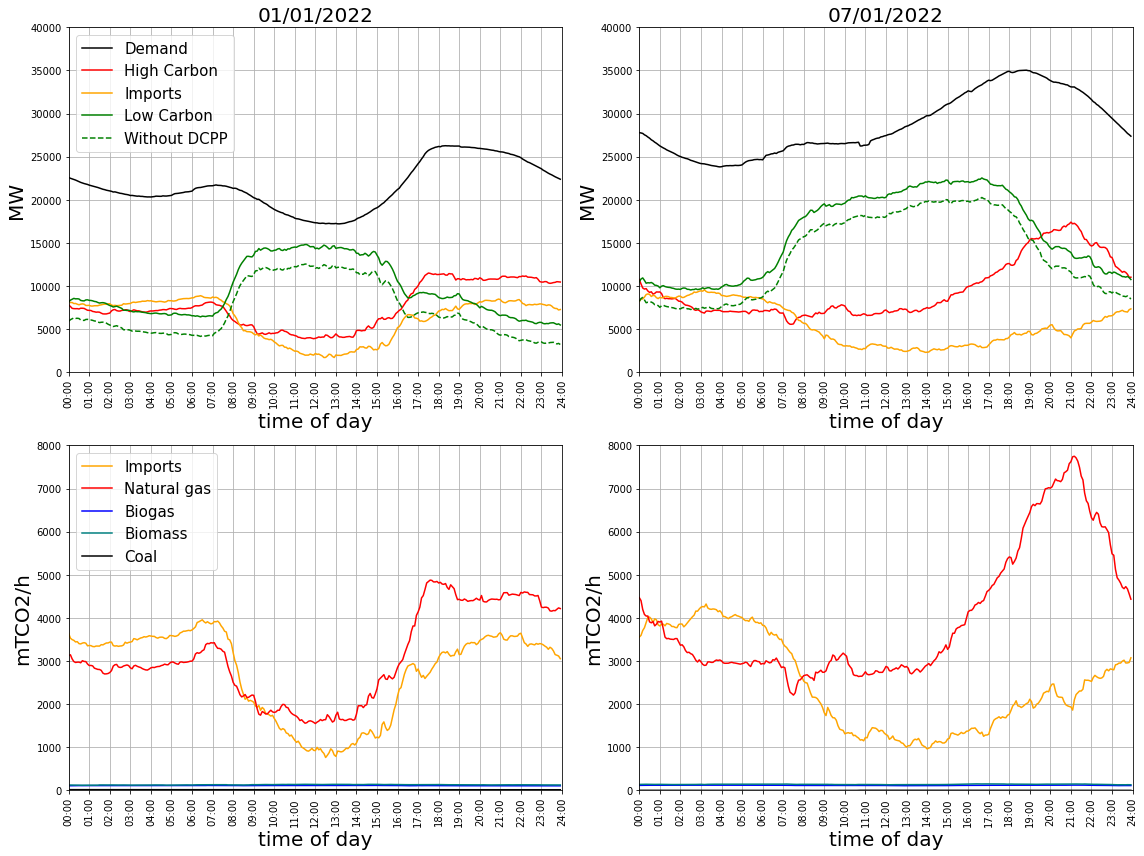

In [84]:
timedf = supdf.columns.values[2:].tolist()

fig, ax = plt.subplots(figsize=(16,12),nrows=2,ncols=2)

ax[0][0].plot(jan1sup.iloc[0][2:].to_numpy(),label=f"{jan1sup.iloc[0][1]}",color='k')
ax[0][0].plot(jan1sup.iloc[1][2:].to_numpy(),label=f"{jan1sup.iloc[1][1]}",color='r')
ax[0][0].plot(jan1sup.iloc[2][2:].to_numpy(),label=f"{jan1sup.iloc[2][1]}",color='orange')
ax[0][0].plot(jan1sup.iloc[3][2:].to_numpy(),label=f"{jan1sup.iloc[3][1]}",color='g')
nonuc = jan1sup.iloc[3][2:].to_numpy()-jan1nuc.iloc[8][2:].to_numpy()
ax[0][0].plot(nonuc,label="Without DCPP",color='g',linestyle="--")
ax[0][0].plot()
ax[0][0].grid()
ax[0][0].legend(fontsize=15)
ax[0][0].set_ylim(0,40000)
ax[0][0].set_xlim(0,287)
ax[0][0].set_ylabel('MW',fontsize=20)
ax[0][0].set_xlabel('time of day',fontsize=20)
ax[0][0].set_xticks(np.arange(0,300,12))
labels = timedf[::12]
labels.append('24:00')
ax[0][0].set_xticklabels(labels,rotation=90);
ax[0][0].set_title(date1,fontsize=20);

ax[0][1].plot(jul1sup.iloc[0][2:].to_numpy(),label=f"{jul1sup.iloc[0][1]}",color='k')
ax[0][1].plot(jul1sup.iloc[1][2:].to_numpy(),label=f"{jul1sup.iloc[1][1]}",color='r')
ax[0][1].plot(jul1sup.iloc[2][2:].to_numpy(),label=f"{jul1sup.iloc[2][1]}",color='orange')
ax[0][1].plot(jul1sup.iloc[3][2:].to_numpy(),label=f"{jul1sup.iloc[3][1]}",color='g')
nonuc2 = jul1sup.iloc[3][2:].to_numpy()-jul1nuc.iloc[8][2:].to_numpy()
ax[0][1].plot(nonuc2,label="Without DCPP",color='g',linestyle="--")
ax[0][1].grid()
ax[0][1].set_ylim(0,40000)
ax[0][1].set_xlim(0,287)
ax[0][1].set_ylabel('MW',fontsize=20)
ax[0][1].set_xlabel('time of day',fontsize=20)
ax[0][1].set_xticks(np.arange(0,300,12))
labels = timedf[::12]
labels.append('24:00')
ax[0][1].set_xticklabels(labels,rotation=90);
ax[0][1].set_title(date2,fontsize=20);

ax[1][0].plot(jan1co2.iloc[0][2:].to_numpy(),label=f"{jan1co2.iloc[0][1]}",color='orange')
ax[1][0].plot(jan1co2.iloc[1][2:].to_numpy(),label=f"{jan1co2.iloc[1][1]}",color='r')
ax[1][0].plot(jan1co2.iloc[2][2:].to_numpy(),label=f"{jan1co2.iloc[2][1]}",color='b')
ax[1][0].plot(jan1co2.iloc[3][2:].to_numpy(),label=f"{jan1co2.iloc[3][1]}",color='teal')
#ax[1][0].plot(jan1co2.iloc[4][2:].to_numpy(),label=f"{jan1co2.iloc[4][1]}",color='brown') #geothermal
ax[1][0].plot(jan1co2.iloc[5][2:].to_numpy(),label=f"{jan1co2.iloc[5][1]}",color='k')
ax[1][0].legend(fontsize=15,loc="upper left")
ax[1][0].grid()
ax[1][0].set_ylim(0,8000)
ax[1][0].set_xlim(0,287)
ax[1][0].set_ylabel('mTCO2/h',fontsize=20)
ax[1][0].set_xlabel('time of day',fontsize=20)
ax[1][0].set_xticks(np.arange(0,300,12))
labels = timedf[::12]
labels.append('24:00')
ax[1][0].set_xticklabels(labels,rotation=90);

ax[1][1].plot(jul1co2.iloc[0][2:].to_numpy(),label=f"{jul1co2.iloc[0][1]}",color='orange')
ax[1][1].plot(jul1co2.iloc[1][2:].to_numpy(),label=f"{jul1co2.iloc[1][1]}",color='r')
ax[1][1].plot(jul1co2.iloc[2][2:].to_numpy(),label=f"{jul1co2.iloc[2][1]}",color='b')
ax[1][1].plot(jul1co2.iloc[3][2:].to_numpy(),label=f"{jul1co2.iloc[3][1]}",color='teal')
#ax[1][1].plot(jul1co2.iloc[4][2:].to_numpy(),label=f"{jul1co2.iloc[4][1]}",color='brown') #geothermal
ax[1][1].plot(jul1co2.iloc[5][2:].to_numpy(),label=f"{jul1co2.iloc[5][1]}",color='k')
ax[1][1].grid()
ax[1][1].set_ylim(0,8000)
ax[1][1].set_xlim(0,287)
ax[1][1].set_ylabel('mTCO2/h',fontsize=20)
ax[1][1].set_xlabel('time of day',fontsize=20)
ax[1][1].set_xticks(np.arange(0,300,12))
labels = timedf[::12]
labels.append('24:00')
ax[1][1].set_xticklabels(labels,rotation=90);
plt.tight_layout()
plt.savefig("EnergyAnalysis.png", dpi=300)